In [9]:
from analysis_utils import main
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from package.orm_models import local_create_session, Result
from itertools import groupby
import sys
from collections import Counter
import pandas as pd
from package.orm_models import Result
import numpy as np
import re

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (14, 9)

In [ ]:
def std_show_results(args):
    sns.heatmap(main(args+['--confusion-matrix']), annot=True, fmt='.0f')
    plt.show()
    main(args+['--plot-correlation'])

In [ ]:
DATABASE = 'tmp_ward_p.db'
default_args = [
    '--db-file', DATABASE,
]

In [ ]:
session = local_create_session(DATABASE)

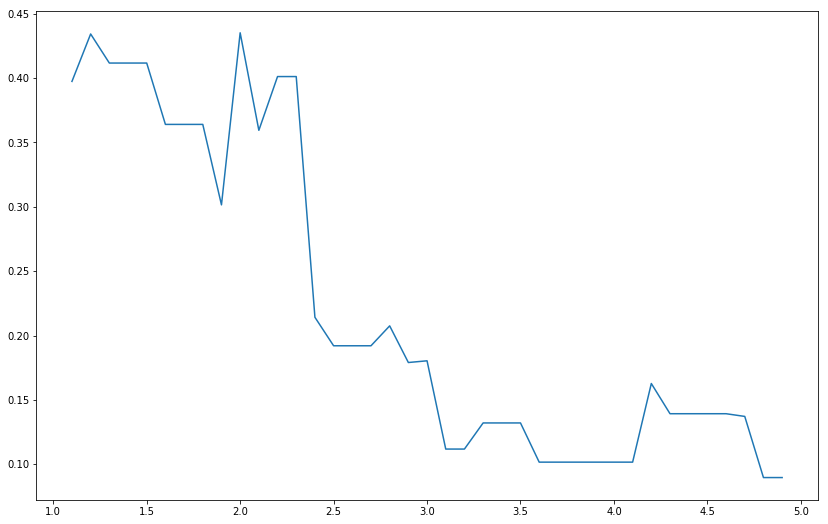

In [32]:
results = session.query(Result).all()
group_results = groupby(results, key=lambda x: list(map(str, x.args)))

results = []
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    for key, group in group_results:
        result = list(group)[0]
        p = [float(re.findall('.*([\d]+\.[\d]+)', arg)[0]) for arg in key if arg.startswith('p_ward:')][0]
        adj_rand = float(result.adjusted_rand_score)
        results += [(p, adj_rand)]
#         p = key[]
#         results[result]
#         for arg in key:
#             print(f'{arg}')
#         results = list(group)
#         selected_features = []
#         for result in results:
#             print(f'\tAccuracy: {result.accuracy}')
#             print(f'\tARI: {result.adjusted_rand_score}')
#             selected_features += result.selected_features
#         selected_features = [feature.column for feature in selected_features]
#         selected_features = dict(Counter(selected_features))
#         selected_features = pd.DataFrame.from_dict(selected_features, orient='index', columns=['count'])
#         selected_features = selected_features.sort_values(by='count', ascending=False)
#         display(selected_features)

#         args = default_args + ['--id'] + list(map(lambda x: str(x.id), results))
#         std_show_results(args)
#         print('-------------------------------------------------------------------------------------')
#         sys.stdout.flush()

results = pd.DataFrame(results, columns=['p', 'adj_rand'])
results = results.sort_values(by='p')
plt.plot(results['p'], results['adj_rand'])

In [ ]:
session.close()